# EDA

From Kaggle - This dataset, titled "PMRAM: Bangladeshi Brain Cancer - MRI Dataset", is a valuable resource for researchers and practitioners in the field of medical imaging, particularly for brain cancer research. It comprises a large collection of Magnetic Resonance Imaging (MRI) images sourced from various hospitals across Bangladesh 🏥. This diverse origin ensures better representation in the sample.

In [1]:
import os
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import torch
import torchvision
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import seaborn as sns
from collections import Counter
import cv2

# Set random seed for reproducibility
random.seed(42)
np.random.seed(42)
torch.manual_seed(42)

# Display settings
plt.style.use('fivethirtyeight')
%matplotlib inline

We'll use PyTorch's ImageFolder class which automatically loads images from a directory structure where each subfolder represents a class.

In [2]:
# Define the data directory - adjust this path to where your data is stored
data_dir_aug = 'dataset/Augmented'  # Update this path as needed

# Basic transforms - just convert to tensor for EDA
transform = transforms.Compose([
    transforms.ToTensor()
])
    
dataset_aug = datasets.ImageFolder(root=data_dir_aug, transform=transform)

In [3]:
# Get class names from the dataset
class_names = dataset_aug.classes
print(f"Class Names: {class_names}")
print(f"Number of Classes: {len(class_names)}")
    
# Class to index mapping
class_to_idx = dataset_aug.class_to_idx
print(f"Class to Index Mapping: {class_to_idx}")

Class Names: ['512Glioma', '512Meningioma', '512Normal', '512Pituitary']
Number of Classes: 4
Class to Index Mapping: {'512Glioma': 0, '512Meningioma': 1, '512Normal': 2, '512Pituitary': 3}


In [4]:
# Examine the folder structure
print("\nFolder Structure:")
for root, dirs, files in os.walk(data_dir_aug, topdown=True):
    level = root.replace(data_dir_aug, '').count(os.sep)
    if level > 1:  # Skip directories deeper than desired
        continue
    indent = ' ' * 4 * level
    print(f"{indent}{os.path.basename(root)}/")
    if level == 1:  # Only show file counts for class directories
        print(f"{indent}    Contains {len(files)} images")


Folder Structure:
Augmented/
    512Glioma/
        Contains 1501 images
    512Meningioma/
        Contains 1501 images
    512Normal/
        Contains 1501 images
    512Pituitary/
        Contains 1501 images


Let's visualize random samples from each class to get a visual understanding of the data.

In [5]:
def show_random_images(dataset, class_names, num_per_class=3):
    """
    Display random images from each class in the dataset
    
    Args:
        dataset: PyTorch dataset
        class_names: List of class names
        num_per_class: Number of images to display per class
    """
    # Create a figure with subplots
    fig, axes = plt.subplots(len(class_names), num_per_class, figsize=(15, 3*len(class_names)))
    
    # Group indices by class
    indices_by_class = [[] for _ in range(len(class_names))]
    for idx, (_, class_idx) in enumerate(dataset.samples):
        indices_by_class[class_idx].append(idx)
    
    # For each class, select random samples
    for class_idx, class_name in enumerate(class_names):
        class_indices = indices_by_class[class_idx]
        
        # Select random samples from this class
        if len(class_indices) >= num_per_class:
            sample_indices = random.sample(class_indices, num_per_class)
        else:
            # If we don't have enough samples, use all and possibly duplicate
            sample_indices = class_indices * (num_per_class // len(class_indices)) + \
                            random.sample(class_indices, num_per_class % len(class_indices))
        
        # Display the images
        for j, sample_idx in enumerate(sample_indices):
            img, _ = dataset[sample_idx]
            
            # Convert tensor to image
            img = img.permute(1, 2, 0).numpy()  # Change from CxHxW to HxWxC
            
            # Handle different number of channels
            if img.shape[2] == 1:  # Grayscale image
                img = img.squeeze(2)
            
            ax = axes[class_idx, j] if len(class_names) > 1 else axes[j]
            ax.imshow(img, cmap='gray' if len(img.shape) == 2 else None)
            ax.set_title(f"{class_name}")
            ax.axis('off')
    
    plt.tight_layout()
    plt.show()

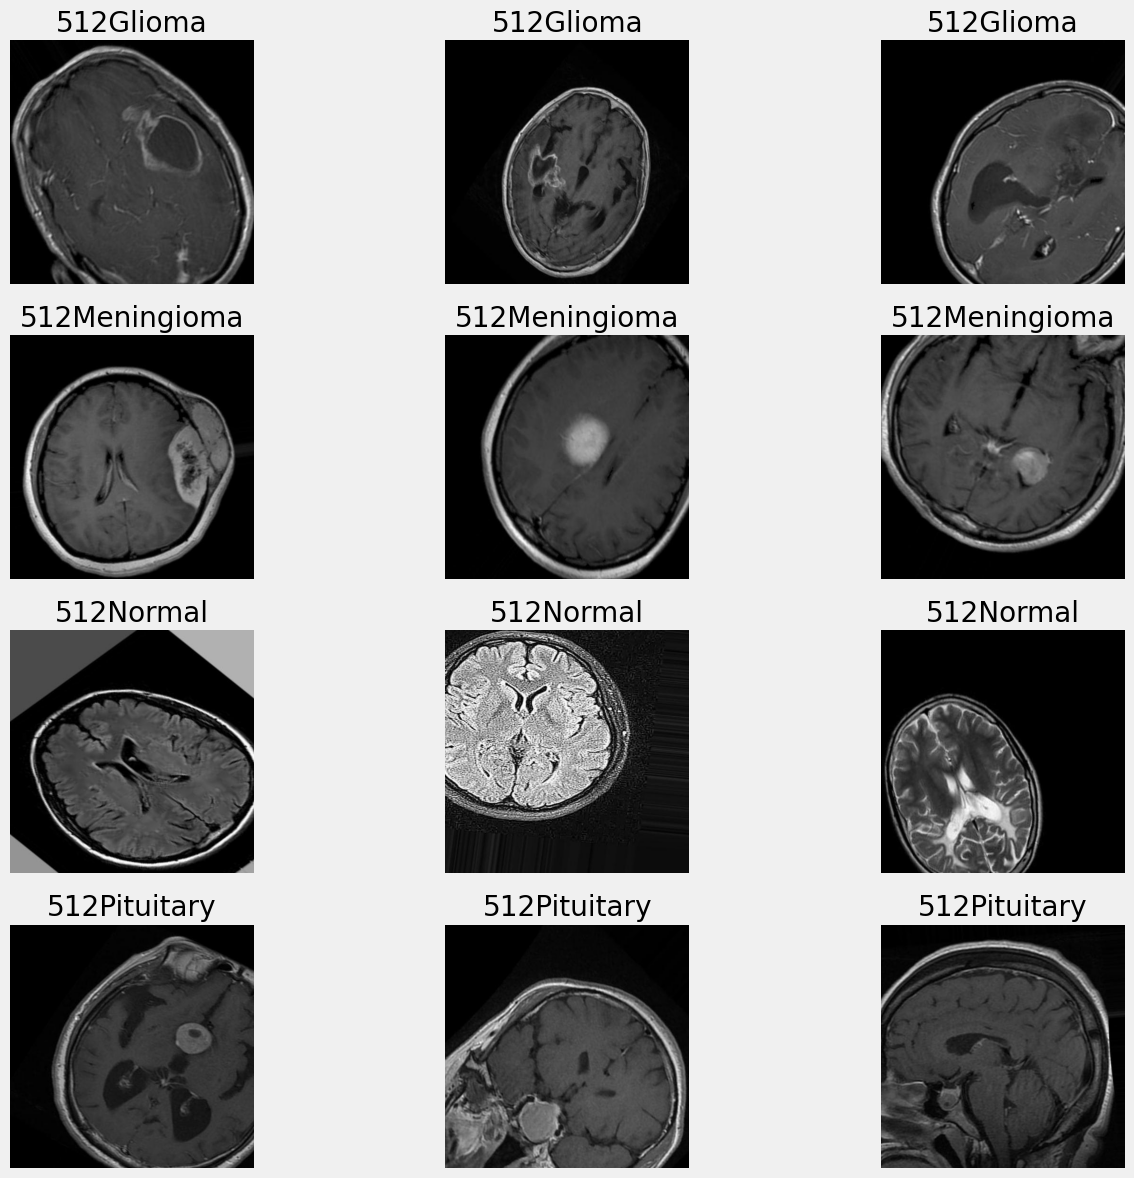

In [6]:
# Display random images from each class
show_random_images(dataset_aug, class_names)

## Repeat the same for the dataset with raw images

In [7]:
# Define the data directory - adjust this path to where your data is stored
data_dir_raw = 'dataset/Raw'  # Update this path as needed

# Basic transforms - just convert to tensor for EDA
transform = transforms.Compose([
    transforms.ToTensor()
])
    
dataset_raw = datasets.ImageFolder(root=data_dir_raw, transform=transform)

In [8]:
# Get class names from the dataset
class_names = dataset_raw.classes
print(f"Class Names: {class_names}")
print(f"Number of Classes: {len(class_names)}")
    
# Class to index mapping
class_to_idx = dataset_raw.class_to_idx
print(f"Class to Index Mapping: {class_to_idx}")

Class Names: ['512Glioma', '512Meningioma', '512Normal', '512Pituitary']
Number of Classes: 4
Class to Index Mapping: {'512Glioma': 0, '512Meningioma': 1, '512Normal': 2, '512Pituitary': 3}


In [9]:
# Examine the folder structure
print("\nFolder Structure:")
for root, dirs, files in os.walk(data_dir_raw, topdown=True):
    level = root.replace(data_dir_raw, '').count(os.sep)
    if level > 1:  # Skip directories deeper than desired
        continue
    indent = ' ' * 4 * level
    print(f"{indent}{os.path.basename(root)}/")
    if level == 1:  # Only show file counts for class directories
        print(f"{indent}    Contains {len(files)} images")


Folder Structure:
Raw/
    512Glioma/
        Contains 373 images
    512Meningioma/
        Contains 363 images
    512Normal/
        Contains 396 images
    512Pituitary/
        Contains 373 images


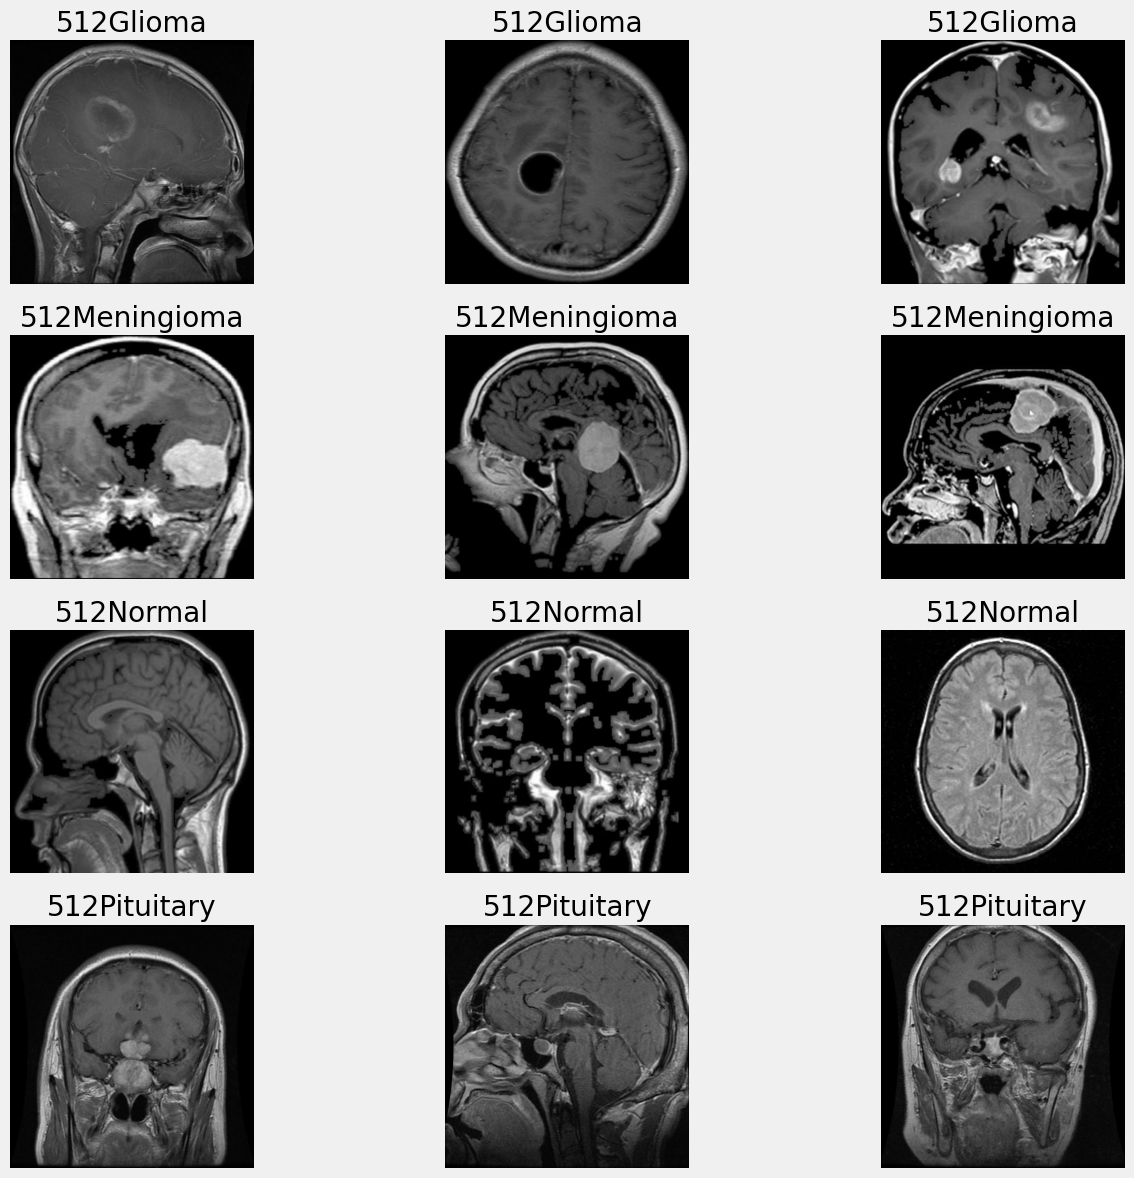

In [10]:
# Display random images from each class
show_random_images(dataset_raw, class_names)